In [1]:
! pip install matplotlib seaborn sklearn pandas numpy apyriori pyfpgrowth

ERROR: Could not find a version that satisfies the requirement apyriori
ERROR: No matching distribution found for apyriori


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy = True

In [3]:
df = pd.read_csv("CustomerData.csv")
df.rename(columns = {'annual income (lakhs)':'income','items purchased (monthly)':'items', 'purchase type ':'type','spending score':'score'},inplace=True)

In [4]:
def display(df):
    print(df.head(), "\n--------------------------------------")
    print(df.tail(), "\n--------------------------------------")
    print(df.describe(), "\n--------------------------------------")
    df.info()
    print("\n--------------------------------------")
    print(df.isna().sum(), "\n--------------------------------------")

   customer_id      name  gender   age  income  score  items      country  \
0            1     Edith  Female   NaN    40.9     27     62         Iran   
1            2  Sinclair    Male  53.0     NaN     42     47        China   
2            3     Enoch    Male  22.0     NaN     70     26        China   
3            4   Lorenzo    Male   9.0    18.5     68     80       Russia   
4            5    Damian    Male  55.0    18.4     69     89  Philippines   

    category     type  
0       Baby  offline  
1        NaN   online  
2  Computers  offline  
3        NaN   online  
4   Jewelery  offline   
--------------------------------------
    customer_id       name  gender   age  income  score  items  country  \
55           56  Annamarie     NaN  36.0    42.3     54     55   Poland   
56           57       Bari  Female  22.0    33.5     36      4  Ukraine   
57           58     Hersch    Male   0.0    57.2     77     58    Chile   
58           59     Brocky    Male   NaN    17.3     

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


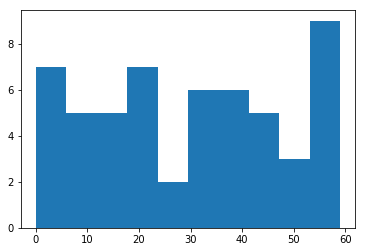

In [5]:
display(df)
plt.hist(df['age'])
plt.show()

In [6]:
df.gender.fillna(df.gender.mode()[0], inplace=True)
df.age.fillna(df.age.mean(), inplace=True)
df.category.fillna(df.category.mode()[0], inplace=True)

In [7]:
df.isna().sum()

customer_id    0
name           0
gender         0
age            0
income         8
score          0
items          0
country        0
category       0
type           0
dtype: int64

In [8]:
df.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,Female,29.945455,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.000000,NaN,42,47,China,Beauty,online
2,3,Enoch,Male,22.000000,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.000000,18.5,68,80,Russia,Beauty,online
4,5,Damian,Male,55.000000,18.4,69,89,Philippines,Jewelery,offline


In [9]:
dict(df.nunique())

{'customer_id': 60,
 'name': 60,
 'gender': 2,
 'age': 42,
 'income': 51,
 'score': 49,
 'items': 47,
 'country': 23,
 'category': 19,
 'type': 2}

In [10]:
for i in list(df.columns):
    if dict(df.nunique())[i]<10:
        print(df[i].value_counts())

Male      43
Female    17
Name: gender, dtype: int64
offline    31
online     29
Name: type, dtype: int64


In [11]:
list(df.columns)

['customer_id',
 'name',
 'gender',
 'age',
 'income',
 'score',
 'items',
 'country',
 'category',
 'type']

In [12]:

list(df.columns)

['customer_id',
 'name',
 'gender',
 'age',
 'income',
 'score',
 'items',
 'country',
 'category',
 'type']

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.age = pd.cut(df.age,bins=[0,10, 20, 60,100], labels=['child', 'teen', 'adult','old'],include_lowest=True)
df[['gender', 'category', 'type', 'age']] = df[['gender', 'category', 'type', 'age']].apply( encoder.fit_transform )
df.head()
df.shape

(60, 10)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.drop(['customer_id'], axis=1, inplace=True)
df.head()

,name,gender,age,income,score,items,country,category,type
0,Edith,0,0,40.9,27,62,Iran,1,0
3,Lorenzo,1,1,18.5,68,80,Russia,2,1
4,Damian,1,0,18.4,69,89,Philippines,12,0
5,Drona,0,0,54.8,35,98,Indonesia,15,0
6,Sylvester,1,2,21.4,52,1,China,2,1


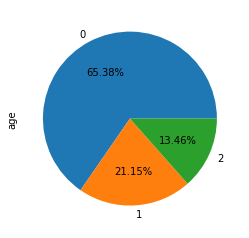

In [16]:
df['age'].value_counts().plot.pie(label='age', autopct="%1.2f%%")

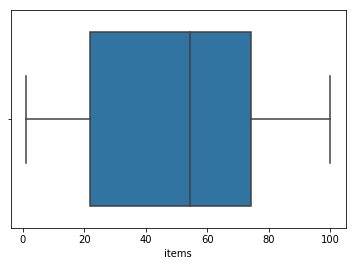

In [17]:
sns.boxplot(data=df, x="items")

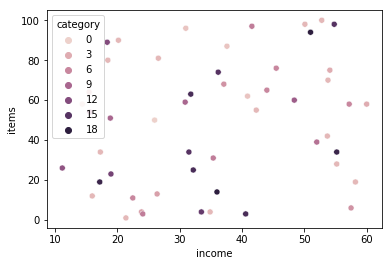

In [18]:
sns.scatterplot(data=df, x='income', y='items', hue='category')

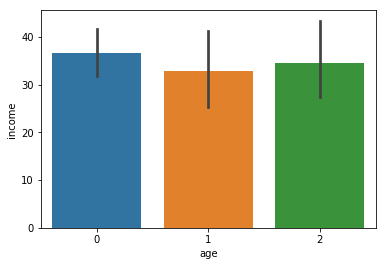

In [19]:
sns.barplot(data=df, x='age', y='income')

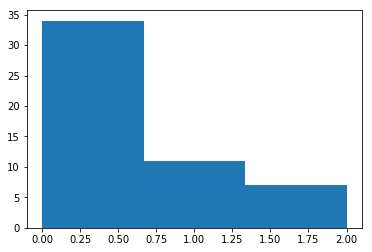

In [20]:
plt.hist(df['age'], bins=3)
plt.show()

In [21]:
# q4-5
transaction = pd.read_csv("association_analysis.csv")

In [22]:
transaction.head()

,tid,onion,tomato,potato,bottleguard,beans
0,1,1,0,1,0,0
1,2,1,0,0,1,1
2,3,0,0,1,0,0
3,4,0,1,1,1,1
4,5,1,1,1,0,0


In [23]:
transaction.isna().sum()

tid            0
onion          0
tomato         0
potato         0
bottleguard    0
beans          0
dtype: int64

In [24]:
transaction.drop(['tid'], axis=1, inplace=True)
transaction.head()

,onion,tomato,potato,bottleguard,beans
0,1,0,1,0,0
1,1,0,0,1,1
2,0,0,1,0,0
3,0,1,1,1,1
4,1,1,1,0,0


In [25]:
from apyori import apriori

records = list()
for i in range(transaction.shape[0]):
    record = list()
    for j in range(len(transaction.columns)):
        if transaction.values[i,j]:
            record.append(transaction.columns[j])
    records.append(record)

rules = list( apriori(records, min_support=0.03, min_confidence=0.7))

print('-'*100)
for rule in rules:
    print(f'Rule: {rule[0]}\nSupport: {rule[1]}\nConfidence: {rule[2][0][2]}')
    print('-'*100)

----------------------------------------------------------------------------------------------------
Rule: frozenset({'tomato', 'bottleguard', 'beans'})
Support: 0.19607843137254902
Confidence: 0.7692307692307693
----------------------------------------------------------------------------------------------------
Rule: frozenset({'tomato', 'potato', 'beans'})
Support: 0.1568627450980392
Confidence: 0.7272727272727272
----------------------------------------------------------------------------------------------------
Rule: frozenset({'tomato', 'bottleguard', 'potato', 'beans'})
Support: 0.09803921568627451
Confidence: 0.8333333333333334
----------------------------------------------------------------------------------------------------
Rule: frozenset({'onion', 'tomato', 'potato', 'beans'})
Support: 0.09803921568627451
Confidence: 0.7142857142857142
----------------------------------------------------------------------------------------------------
Rule: frozenset({'onion', 'tomato', 'bo

In [26]:
import pyfpgrowth
itemsets = pyfpgrowth.find_frequent_patterns(records, 0.03)
association = pyfpgrowth.generate_association_rules(itemsets, 0.7)
# itemsets
association

{('bottleguard', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('bottleguard', 'onion', 'tomato'): (('potato',), 0.8333333333333334),
 ('beans', 'bottleguard', 'onion', 'potato'): (('tomato',), 0.75),
 ('beans', 'bottleguard', 'onion', 'tomato'): (('potato',), 1.0),
 ('beans', 'bottleguard', 'potato'): (('tomato',), 0.8333333333333334),
 ('beans', 'bottleguard'): (('tomato',), 0.7692307692307693),
 ('bottleguard', 'tomato'): (('beans',), 0.7142857142857143),
 ('beans', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('beans', 'onion', 'tomato'): (('potato',), 0.7142857142857143)}

In [27]:
from sklearn.model_selection import train_test_split
features = df[['gender', 'income']]
target = df['type']
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test, y_test)

0.75

[[4 4]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.67      1.00      0.80         8

   micro avg       0.75      0.75      0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16



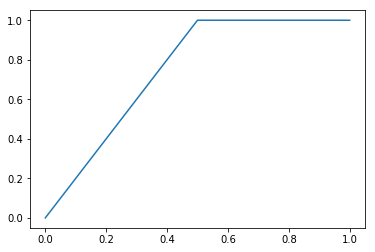

In [31]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))
roc = metrics.roc_curve(y_test, pred)
sns.lineplot(x = roc[0], y=roc[1])
plt.show()

0.6875
[[4 4]
 [1 7]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.64      0.88      0.74         8

   micro avg       0.69      0.69      0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



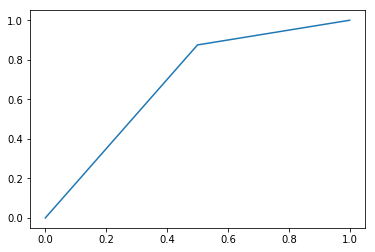

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

roc = metrics.roc_curve(y_test, pred)
sns.lineplot(x = roc[0], y = roc[1])
plt.show()

0.625
[[4 4]
 [2 6]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.75      0.67         8

   micro avg       0.62      0.62      0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


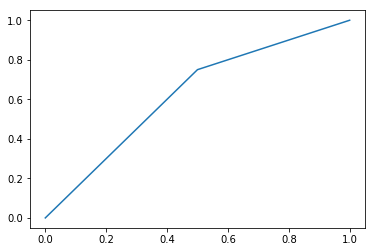

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

roc = metrics.roc_curve(y_test, pred)
sns.lineplot(x = roc[0], y = roc[1])
plt.show()

0.625
[[4 4]
 [2 6]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.75      0.67         8

   micro avg       0.62      0.62      0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



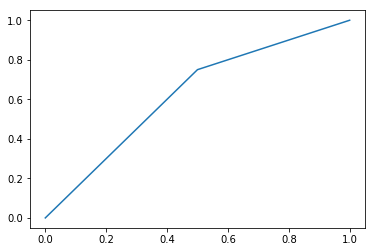

In [34]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

roc = metrics.roc_curve(y_test, pred)
sns.lineplot(x = roc[0], y = roc[1])
plt.show()

-895.9709876543204
[[6 2]
 [7 1]]
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.33      0.12      0.18         8

   micro avg       0.44      0.44      0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



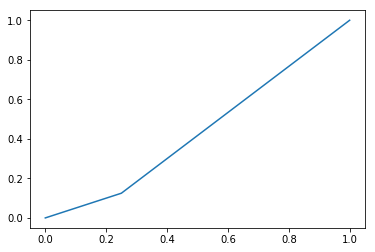

In [35]:
# df.dropna(axis=0, inplace=True)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(x_train, y_train)

pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

roc = metrics.roc_curve(y_test, pred)
sns.lineplot(x = roc[0], y = roc[1])
plt.show()

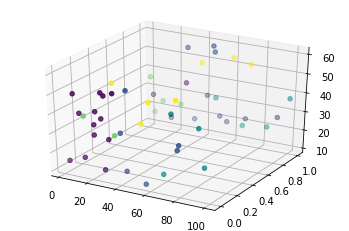

In [38]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
cluster = model.fit_predict(df[['gender','category','type','score','items','income']])

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(df.score, df.type, df.income, c=cluster,)
plt.show()